In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import plotly.tools as tls
import plotly.plotly as py
import scipy.special as scpysp

atlet = pd.read_csv('../Dataset/athletes.csv', sep=',',engine = 'python')
#print(atlet)
atlet.head(10)

,Name,Medal
0,A Dijiang,0
1,A Lamusi,0
2,A. Aanantha Sambu Mayavo,0
3,A. Abdul Razzak,0
4,A. Brun,0
5,A. Buydens,0
6,A. Charles Six,0
7,A. Christory,0
8,A. Darnis,0
9,A. Duponcheel,0


In [2]:
atlet.tail(10)

,Name,Medal
134721,Paavo Johannes Nurmi,12
134722,Ryan Steven Lochte,12
134723,Sawao Kato,12
134724,Borys Anfiyanovych Shakhlin,13
134725,Edoardo Mangiarotti,13
134726,Ole Einar Bjrndalen,13
134727,Takashi Ono,13
134728,Nikolay Yefimovich Andrianov,15
134729,Larysa Semenivna Latynina (Diriy-),18
134730,"Michael Fred Phelps, II",28


# Stastitical Description

In [3]:
Medal = atlet['Medal']
Min_medal = atlet['Medal'].min()
print("Minimum value of Medal = " + str(Min_medal))

Max_medal = atlet['Medal'].max()
print("Makimum value of Medal = " + str(Max_medal))

Mean_medal = atlet['Medal'].mean()
print("Mean value of Medal = " + str(Mean_medal))

Mode_medal = atlet['Medal'].mode()[0]
print("Mode value of Medal = " + str(Mode_medal))

Median_medal = atlet['Medal'].median()
print("Median value of Medal = " + str(Median_medal))

Variance_medal = atlet['Medal'].var()
print("Variance value of Medal = " + str(Variance_medal))

std_medal = atlet['Medal'].std()
print("Standard Deviation value of Medal = " + str(std_medal))

skew_medal = atlet['Medal'].std()
print("Skewness value of Medal = " + str(skew_medal))

kur_medal = atlet['Medal'].kurtosis()
print("Kurtosis value of Medal = " + str(kur_medal))


Minimum value of Medal = 0
Makimum value of Medal = 28
Mean value of Medal = 0.2952772561622789
Mode value of Medal = 0
Median value of Medal = 0.0
Variance value of Medal = 0.5252132778007574
Standard Deviation value of Medal = 0.7247159980300956
Skewness value of Medal = 0.7247159980300956
Kurtosis value of Medal = 51.562525836059855


# Visualisasi Data

# Histogram

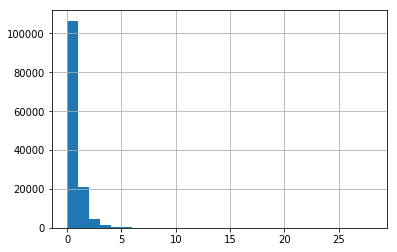

In [4]:
range_bin_size = Max_medal -Min_medal
Medal.hist(bins = range_bin_size)

# Box Plot 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8fe8b9b438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8fe8b9bac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8fe8b9b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8fe8b50198>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8fe8b504e0>],
 'means': []}

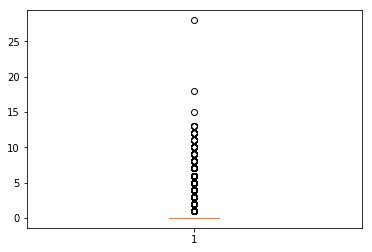

In [5]:
plt.boxplot(Medal)

In [6]:
#Fungsi untuk menentukan distribusi yang cocok
import scipy.stats as st

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,
        st.chisquare,
        st.beta,
        st.norm,
        st.uniform
    ]

    # Best holders
    best_distribution = st.gamma
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [7]:
fungsi = best_fit_distribution(Medal)

In [8]:
print(fungsi)

('gamma', (0.0, 1.0))


# Fungsi Distribusi
Fungsi distribusi ini yaitu distribusi gamma

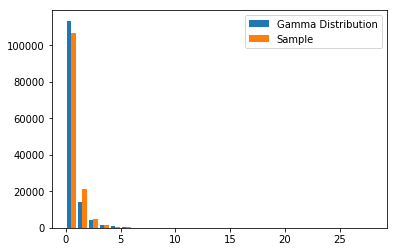

In [9]:
beta = Medal.var()/Medal.mean()
alpha = Medal.mean()/beta
x_gamma = pd.DataFrame(np.random.gamma(alpha,beta,len(Medal.index)))
plt.hist([x_gamma[0].round(),Medal],bins=range_bin_size,label=["Gamma Distribution","Sample"])
plt.legend(loc = 'upper right')
plt.show()

In [10]:
#Setelah dibandingkan data sampel dengan distribusi gamma, data sampel memiliki kemiripan dengan distribusi gamma 

# Soal A.i
Peluang Y meraih 0 medali.
maka peluang seseorang tidak mendapatkan medali sama dengan peluang x <= 0.5.
Distribusi kumulatif dari distribusi gamma adalah F(x) = g(alpha, x*beta) / Gamma(alpha)

In [11]:
scpysp.gammainc(alpha,0.5*beta)

0.9495725310243279

# Soal A.ii
Peluang memperoleh lebih dari 10 medali
P(X>=10.5) = 1 - P(X<=10.5)

In [12]:
1 - scpysp.gammainc(alpha,10.5*beta)

1.156553741665789e-10

# Soal A.iii
Peluang tepat 3 medali
P(X==3) ~ P(2.5<=X<=3.5) = P(X<=3.5) - P (X<=2.5)

In [63]:
scpysp.gammainc(alpha,3.5*beta) - scpysp.gammainc(alpha,2.5*beta)

0.0004516462780106423

# Soal A.iv
Peluang satu atau tiga medali
P(X==1 atau X==5) = P(0.5<=X<=1.5) + P(4.5<=X<=5.5)
P(X==1 atau X==5) = P(X<=1.5) - P(X<=0.5) + P(X<=5.5) - P(X<=4.5)

In [64]:
scpysp.gammainc(alpha,1.5*beta)-scpysp.gammainc(alpha,0.5*beta) + scpysp.gammainc(alpha,5.5*beta) - scpysp.gammainc(alpha,4.5*beta)

0.04605229515401199

# Soal B
confidence interval

In [67]:
# confidence interval untuk estimator mean  yakni x bar
# Distribusi yang digunakan adalah distribusi t-student ,karena simpangan baku populasi tidak diketahui
# derajat kebebasannya sebesar 134730 (sample size - 1)
# ta/2 = 2.241428
# Confidence interval 95% untuk mean populasi :

t_val = 2.241428
data_std = Medal.std()
data_mean = Medal.mean()
lower_boundary = data_mean - t_val*(data_std/len(Medal.index))
upper_boundary = data_mean + t_val*(data_std/len(Medal.index))
print("95 % confidence interval mean estimator x_bar : ")
print(str(lower_boundary) , " < mean < " , str(upper_boundary))

95 % confidence interval mean estimator x_bar : 
0.2952651995551875  < mean <  0.2952893127693703


In [68]:
# confidence interval untuk estimator variansi, yakni variansi sampel
# Distribusi yang digunakan adalah distribusi chi-square, dengan level signifikansi 5 %
# Derajat kebebasannya sebesar 134730 (sample size - 1)
# Nilai darititik kritis atas = 31591.782 dan kritis bawah = 131591.782 
# Confidence interval 95% untuk simpangan baku populasi :
std_lowbound = (len(Medal.index)-1)*(data_std)**2/131591.782
std_upbound = (len(Medal.index)-1)*(data_std)**2/131591.782

print("95 % confidence interval variance estimator sample variance : ")
print(str(std_lowbound) , " < mean < " , str(std_upbound))

95 % confidence interval variance estimator sample variance : 
0.5377386326305396  < mean <  0.5377386326305396
